# Enunciado

Realizar el ejercicio 3 de Naive Bayes y KNN con RandomForest.

# 1. Importación de datos   

In [22]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv("csv/winequality-red.csv")

# Reemplazar espacios en los nombres de las columnas por guiones bajos
df.columns = [x.replace(" ", "_") for x in df.columns]

# Mostrar las primeras filas del DataFrame
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Preparación de los datos

In [23]:
# Separar las características (X) de la variable objetivo (y)
X = df.drop("quality", axis=1)  # características (todas las columnas excepto 'quality')
y = df["quality"]  # variable objetivo ('quality')

# Mostrar las primeras filas de las características y la variable objetivo
print("Características (X):")
print(X.head())

print("\nVariable Objetivo (y):")
print(y.head())


Características (X):
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  


# 3. Visualización de los datos

C:\Users\Marcos\AppData\Local\Temp\ipykernel_14232\4135252308.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  for i, data in enumerate(df.groupby("quality").apply(lambda x: x[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values)):


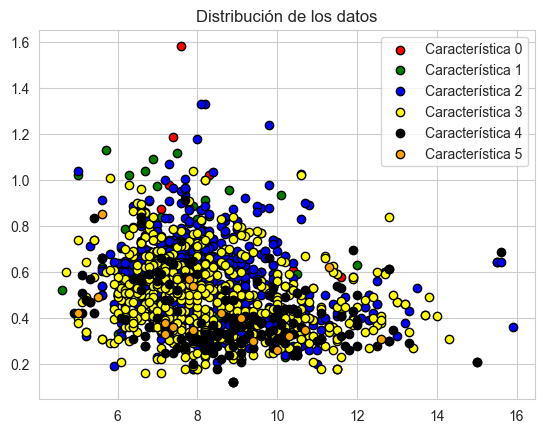

In [24]:
from matplotlib import pyplot as plt

# Lista de colores para cada categoría de calidad
COLORS = ["red", "green", "blue", "yellow", "black", "orange", "purple", "pink", "brown", "gray", "cyan"]

# Iterar sobre las categorías de calidad y visualizar la distribución de las características
for i, data in enumerate(df.groupby("quality").apply(lambda x: x[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values)):
    plt.scatter(data[:, 0], data[:, 1], c=COLORS[i], edgecolors='k', label=f'Característica {i}')

# Configurar título y leyenda
plt.title('Distribución de los datos')
plt.legend()

# Mostrar el gráfico de dispersión
plt.show()

# 4. Visualización de la distribución de los datos

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


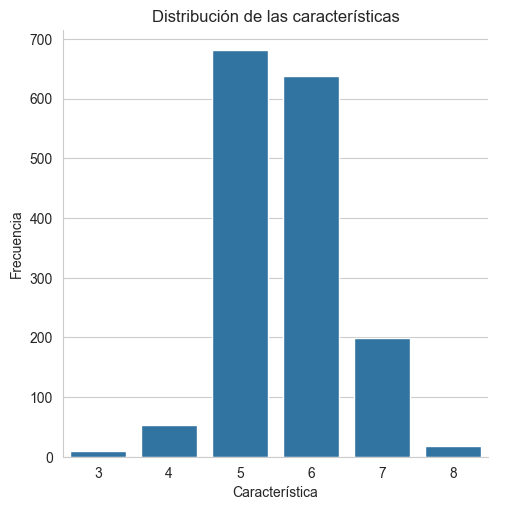

In [25]:
import seaborn as sns
from matplotlib import pyplot as plt

# Configurar el estilo del gráfico
sns.set_style("whitegrid")

# Imprimir el tamaño de cada categoría en la variable objetivo "quality"
print(df["quality"].groupby(df["quality"]).size())

# Crear un gráfico de barras utilizando Seaborn
sns.catplot(x="quality", kind="count", data=df)

# Configurar título y etiquetas de ejes
plt.title('Distribución de las características')
plt.xlabel('Característica')
plt.ylabel('Frecuencia')

# Mostrar el gráfico de barras
plt.show()


# 5. Preparación del conjunto de datos

In [26]:
from sklearn.model_selection import train_test_split

# Proporción de datos para el conjunto de entrenamiento
p_train = 0.7

# Dividir el conjunto de datos en entrenamiento y prueba
train, test = train_test_split(df, train_size=p_train, random_state=42)

# Restablecer los índices después de la división
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

# Imprimir las dimensiones de los conjuntos
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

# Imprimir las primeras filas de los conjuntos
print("\nConjunto de entrenamiento:")
print(train.head())

print("\nConjunto de prueba:")
print(test.head())


Train: (1119, 12)
Test: (480, 12)

Conjunto de entrenamiento:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            8.6              0.22         0.36             1.9      0.064   
1           12.5              0.46         0.63             2.0      0.071   
2            7.2              0.54         0.27             2.6      0.084   
3            6.4              0.67         0.08             2.1      0.045   
4            7.5              0.58         0.14             2.2      0.077   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 53.0                  77.0  0.99604  3.47       0.87   
1                  6.0                  15.0  0.99880  2.99       0.87   
2                 12.0                  78.0  0.99640  3.39       0.71   
3                 19.0                  48.0  0.99490  3.49       0.49   
4                 27.0                  60.0  0.99630  3.28       0.59   

   alcohol  quality  
0 

# 6. Parametrización

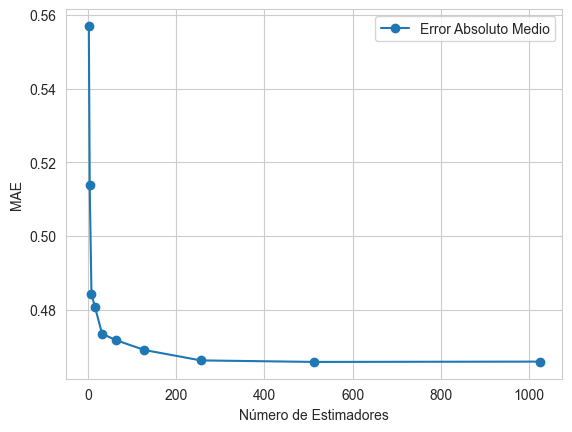

In [27]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Configuración de la validación cruzada temporal (Time Series Split)
cv = TimeSeriesSplit()

# Lista de número de estimadores para evaluar
l_estimators = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

# Lista para almacenar los resultados de la métrica de evaluación (MAE) para cada número de estimadores
total_scores = []

# Iterar sobre diferentes números de estimadores
for estimators in l_estimators:
    # fold_errors para modelo de clasificación, fold_accuracies para modelo de regresión
    fold_accuracies = []  # Lista para almacenar la métrica MAE en cada pliegue (fold)
    
    # Configuración del modelo de regresión de bosque aleatorio con el número actual de estimadores
    regressor = RandomForestRegressor(n_estimators=estimators,
                                       criterion="squared_error",  # Criterio de regresión cuadrático
                                       random_state=42)
    
    # Iterar sobre los pliegues generados por la validación cruzada temporal
    for train_fold, test_fold in cv.split(train):
        
        # División del conjunto de datos en entrenamiento y prueba según el pliegue actual
        f_train = train.loc[train_fold]
        f_test = train.loc[test_fold]
        
        # Entrenamiento y predicción del modelo de regresión
        regressor.fit(X=f_train.drop(['quality'], axis=1),
                      y=f_train['quality'])
        y_pred = regressor.predict(X=f_test.drop(['quality'], axis=1))
        
        # Evaluación del modelo utilizando la métrica de error absoluto medio (MAE)
        mae = mean_absolute_error(f_test['quality'], y_pred)
        fold_accuracies.append(mae)

    # Calcular el promedio de la métrica MAE para todos los pliegues y almacenarlo en la lista total_scores
    total_scores.append(sum(fold_accuracies) / len(fold_accuracies))

# Graficar los resultados
plt.plot(l_estimators, total_scores, marker='o')
plt.ylabel('MAE')  # Etiqueta del eje y
plt.xlabel('Número de Estimadores')  # Etiqueta del eje x
plt.legend(['Error Absoluto Medio'])  # Leyenda del gráfico
plt.show()


In [28]:
import numpy as np

# Encontrar el número de estimadores que minimiza el MAE
best_est = l_estimators[np.argmin(total_scores)]

# Encontrar el valor mínimo del MAE
best_mae = min(total_scores)

# Imprimir el número óptimo de estimadores y el MAE mínimo
print("Min Value (estimators = %i, MAE = %6.2f)" % (best_est, best_mae))


Min Value (estimators = 512, MAE =   0.47)


# 7. Creación del modelo

In [29]:
# Configurar el regresor de bosque aleatorio con el número óptimo de estimadores
regressor = RandomForestRegressor(n_estimators=best_est,
                                   criterion="squared_error",
                                   random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
regressor.fit(X=train.drop(['quality'], axis=1),
               y=train['quality'])

# Realizar predicciones en el conjunto de prueba
y_pred = regressor.predict(X=test.drop(['quality'], axis=1))


In [30]:
from sklearn.metrics import mean_absolute_error

# Calcular el MAE entre las etiquetas reales y las predicciones del modelo
mae = mean_absolute_error(test['quality'], y_pred)

# Imprimir el valor del MAE
print(f"Error: {mae}")


Error: 0.44146728515625
